In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 -4*x + 5

In [ ]:
f(3)

20

In [ ]:
xs=np.arange(-5,5,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [ ]:
ys=f(xs)

In [ ]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

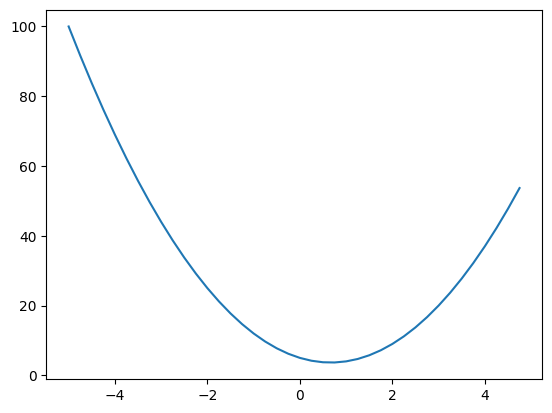

In [ ]:
plt.plot(xs,ys)

In [ ]:
h=0.00001
x=3
f(x+h)

20.0001400003

In [ ]:
(f(x+h)-f(x))/h

14.00003000000538

In [ ]:
def derivative(x):
  h=0.000001
  return ((f(x+h)-f(x))/h)

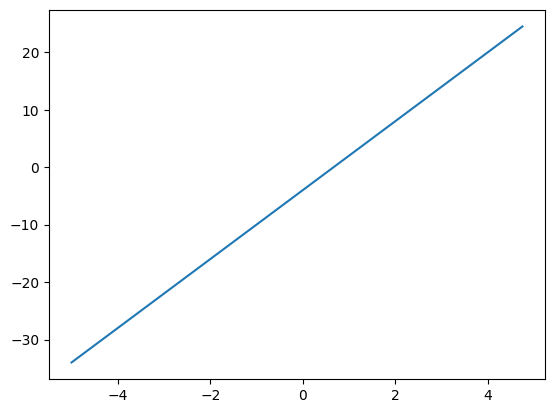

In [ ]:
derivatives=derivative(xs)
plt.plot(xs,derivatives)

In [ ]:
#more complex
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [ ]:
h=0.0001

#inputs
a=2.0
b=-3.0
c=10.0
d1=a*b+c
print("d1",d1)
a+=h
d2=a*b+c
print("d2",d2)
print("slope wrt a",(d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope wrt a -3.000000000010772


In [ ]:
h=0.0001

#inputs
a=2.0
b=-3.0
c=10.0
d1=a*b+c
print("d1",d1)
a+=h
d2=a*b+c
print("d2",d2)
print("slope wrt a",(d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope wrt a -3.000000000010772


In [ ]:
h=0.0001

#inputs
a=2.0
b=-3.0
c=10.0
d1=a*b+c
print("d1",d1)
b+=h
d2=a*b+c
print("d2",d2)
print("slope wrt b",(d2-d1)/h)

d1 4.0
d2 4.0002
slope wrt b 2.0000000000042206


In [ ]:
h=0.0001

#inputs
a=2.0
b=-3.0
c=10.0
d1=a*b+c
print("d1",d1)
c+=h
d2=a*b+c
print("d2",d2)
print("slope wrt c",(d2-d1)/h)

d1 4.0
d2 4.0001
slope wrt c 0.9999999999976694


In [ ]:
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    out= Value(self.data+other.data,(self,other),'+')
    return out
  def __mul__(self,other):
    out= Value(self.data*other.data,(self,other),'*')
    return out

a=Value(2.0, label='a')
b=Value(-3.0, label='b')
c=Value(10.0, label='c')
e=a*b; e.label='e'
d=e+c
d.label='d'
a*b+c
f=Value(-2,label='f')
L=d*f
L.label='L'
L1=L.data


In [ ]:
from graphviz import Digraph

def trace(root):
  nodes,edges=set(),set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child,v))
        build(child)
  build(root)
  return nodes,edges

def draw_dot(root):
  dot=Digraph(format='svg',graph_attr={"rankdir":"LR"}) #LR= Left to Right
  nodes,edges= trace(root)
  for n in nodes:
    uid=str(id(n))
    #create a record node
    dot.node(name=uid, label="{%s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad), shape='record')
    if n._op:
      #if this node is th a res
      dot.node(name=uid+n._op,label=n._op)
      dot.edge(uid+n._op,uid)
  for n1,n2 in edges:
    dot.edge(str(id(n1)),str(id(n2))+n2._op)

  return dot

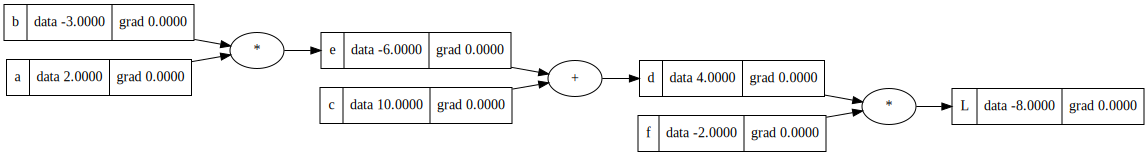

In [ ]:
draw_dot(L)

In [ ]:
id(d)

132969372252336

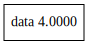

In [ ]:
dot=Digraph(format='svg',graph_attr={"rankdir":"LR"}) #LR= Left to Right
dot.node(name=str(id(d)), label="{ data %.4f}" % (d.data, ), shape='record')
dot

Derivative wrt a=6

In [ ]:
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L1=L.data
#a+h
  a=Value(2.0+h, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L2=L.data

  print((L2-L1)/h)
lol()

6.000000000021544


Derivative wrt L=1

In [ ]:
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L1=L.data
#a+h
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L2=L.data+h

  print((L2-L1)/h)
lol()

0.9999999999976694


In [ ]:
L.grad=1.0

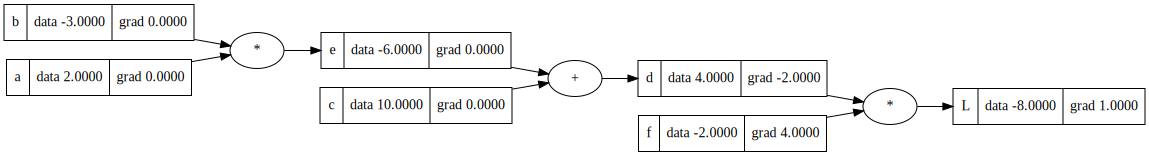

In [ ]:
"""
if L=d*f
then dl/dd=f

we can use this property to find gradients of each node

"""
d.grad=f.data
f.grad=d.data
draw_dot(L)

gradient wrt f=d.data

In [ ]:
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L1=L.data
#a+h
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2+h,label='f')
  L=d*f
  L.label='L'
  L2=L.data

  print((L2-L1)/h)
lol()

3.9999999999995595


gradient wrt d=f.data

In [ ]:
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L1=L.data
#a+h
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.data+=h
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L2=L.data

  print((L2-L1)/h)
lol()

-1.9999999999953388


# CRUX OF BACKPROPAGATION!!!!

In [ ]:
"""How do we find dL/dc?

d=e+c
for grad wrt c, e=a*b is constant
1.We know dL/dd
2.And we can find dd/dc

And

dL/dc=dL/dd * dd/dc using chain rule

we can use this property to find the result
"""

'How do we find dL/dc?\n\nd=e+c\nfor grad wrt c, e=a*b is constant\n1.We know dL/dd\n2.And we can find dd/dc\n\nAnd\n\ndL/dc=dL/dd * dd/dc using chain rule\n\nwe can use this property to find the result\n'

In [ ]:
#DERIVATIVE of d wrt c =1
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  d1=d.data
#a+h
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0+h, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  d2=d.data

  print((d2-d1)/h)
lol()

0.9999999999976694


In [ ]:
ddbydc=1.0

In [ ]:
#derivative of c wrt L using chain rule

In [ ]:
dLbydc=d.grad*ddbydc
dLbydc

-2.0

In [ ]:
#derivative of L wrt c using code
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L1=L.data
#a+h
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0+h, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L2=L.data

  print((L2-L1)/h)
lol()

-1.9999999999953388


In [ ]:
"""
We can see that the answer due to chain rule is the same as the answer we got by running on the whole network
"""

'\nWe can see that the answer due to chain rule is the same as the answer we got by running on the whole network\n'

In [ ]:
"d=e+c"

'd=e+c'

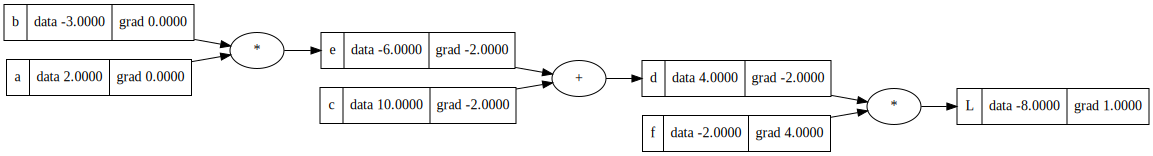

In [ ]:
"""Therefore by this logic we can also find grad of e and c"""
e.grad=-2
c.grad=-2
draw_dot(L)

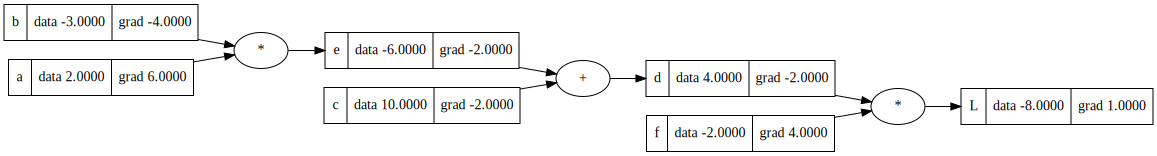

In [ ]:
"""
e=a*b
thus
de/da=b
and
de/db=a
therefore
dL/db= dL/de *de/db =-2*a
dL/da= dL/de *de/da =-2*b
"""
b.grad=e.grad*a.data
a.grad=e.grad*b.data
draw_dot(L)

In [ ]:
"""
VERIFICATION
"""
#derivative of L wrt a using code
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L1=L.data
#a+h
  a=Value(2.0+h, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L2=L.data

  print((L2-L1)/h)
print("grad wrt a is:")
lol()

"""
VERIFICATION
"""
#derivative of L wrt a using code
def lol():
  h=0.0001
  a=Value(2.0, label='a')
  b=Value(-3.0, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L1=L.data
#a+h
  a=Value(2.0, label='a')
  b=Value(-3.0+h, label='b')
  c=Value(10.0, label='c')
  e=a*b; e.label='e'
  d=e+c
  d.label='d'
  a*b+c
  f=Value(-2,label='f')
  L=d*f
  L.label='L'
  L2=L.data

  print((L2-L1)/h)
print("grad wrt b is:")
lol()

grad wrt a is:
6.000000000021544
grad wrt b is:
-4.000000000008441


In [ ]:
"""THIS IS THE SAME AS WE CALCULATED USING CHAIN RULE!"""

'THIS IS THE SAME AS WE CALCULATED USING CHAIN RULE!'

In [ ]:
a.data+= 0.01 * a.grad
b.data+= 0.01 * b.grad
c.data+= 0.01 * c.grad
f.data+= 0.01 * f.grad
e=a*b
d=e+c
# d.label='d'
# a*b+c
# f=Value(-2,label='f')
print("Before:",L.data)
L=d*f
# L.label='L'
print("After",L.data)

Before: -8.0
After -7.286496


# Manually Implementing on Neurons

## Implementation of a Neuron

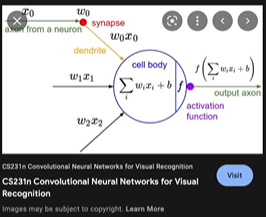

The activation function is something like a tanh or a sigmoid function

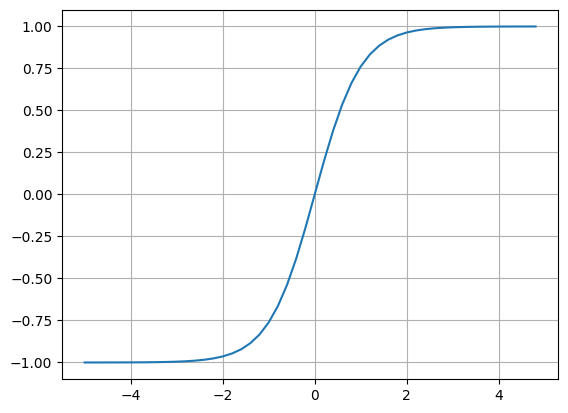

In [ ]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));
plt.grid();

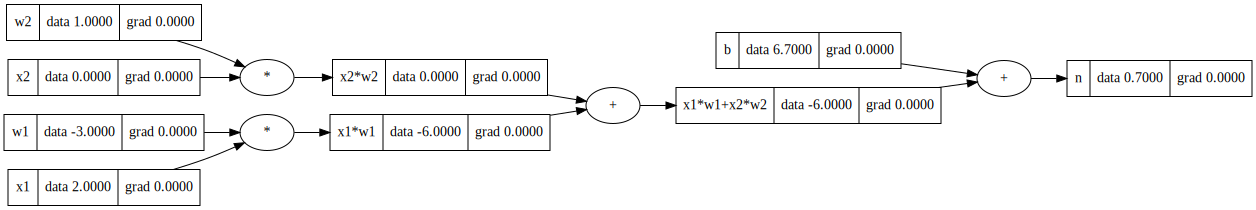

In [ ]:
#inputs
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias
b=Value(6.7,label='b')
# n = x1*w1+ x2*w2 + b
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
draw_dot(n)

## Implementing tanh

In [ ]:
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    out= Value(self.data+other.data,(self,other),'+')
    return out
  def __mul__(self,other):
    out= Value(self.data*other.data,(self,other),'*')
    return out
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    return out

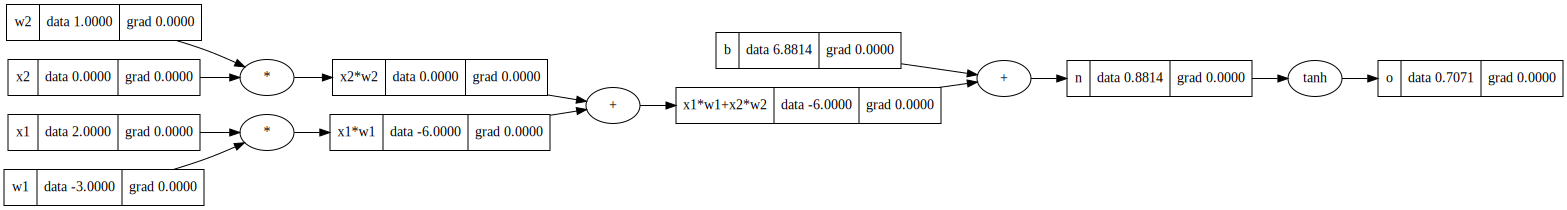

In [ ]:
#inputs
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias
b=Value(6.8813735870195432,label='b')
# n = x1*w1+ x2*w2 + b
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'
draw_dot(o)
# draw_dot(n)

In [ ]:
o.grad=1.0

In [ ]:
# o= tanh(n)
"""
do/dn=d(tanh(n))/dn
thus do/dn=1-tanh**2(n)
"""
1-o.data**2

0.4999999999999999

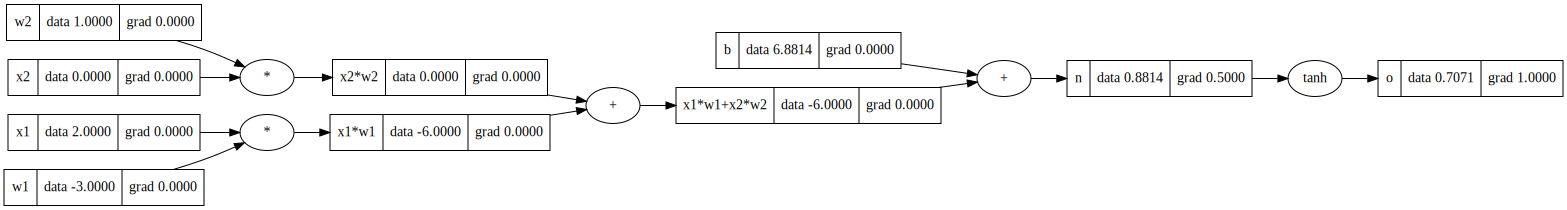

In [ ]:
#thus
n.grad=0.5
draw_dot(o)

As we know from the previous example that gradient just flows backward in the backpropagation of "+" , the gradient will simply flow to node b and x1w1x2w2  

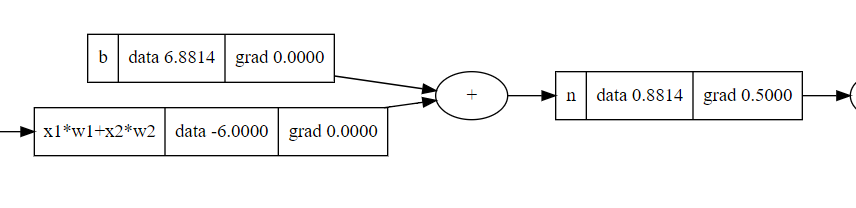

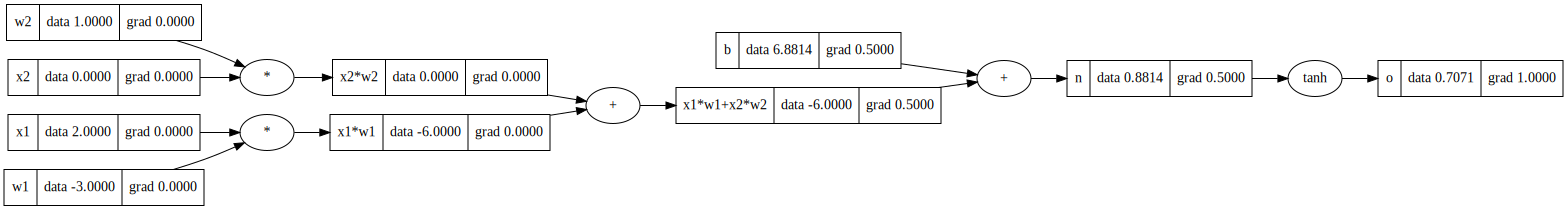

In [ ]:
b.grad=0.5
x1w1x2w2.grad=0.5
draw_dot(o)

Again, we will do the same for x1w1 and x2w2

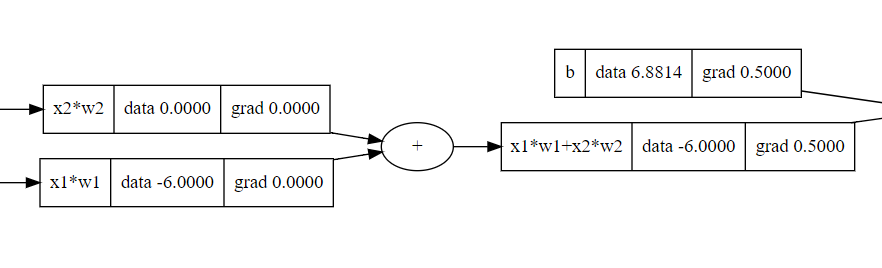

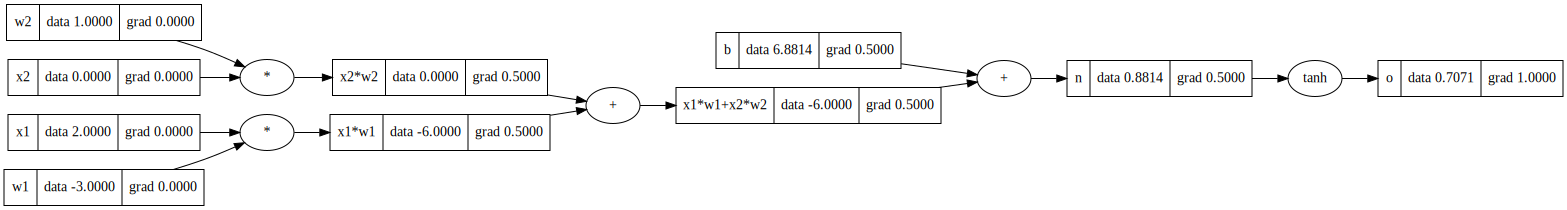

In [ ]:
x2w2.grad=x1w1x2w2.grad
x1w1.grad=x1w1x2w2.grad
draw_dot(o)

For the multiplication case, the gradient is simply the data of the parter node multiplied with the gradient of the result node.  

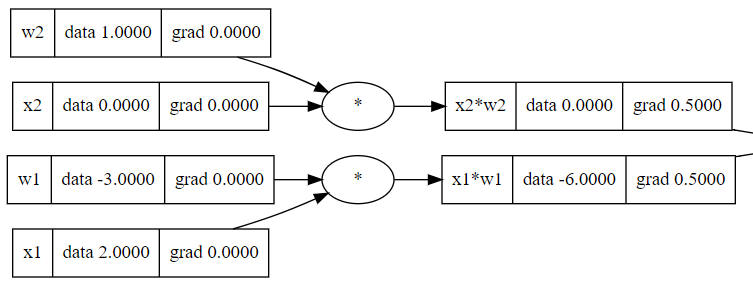

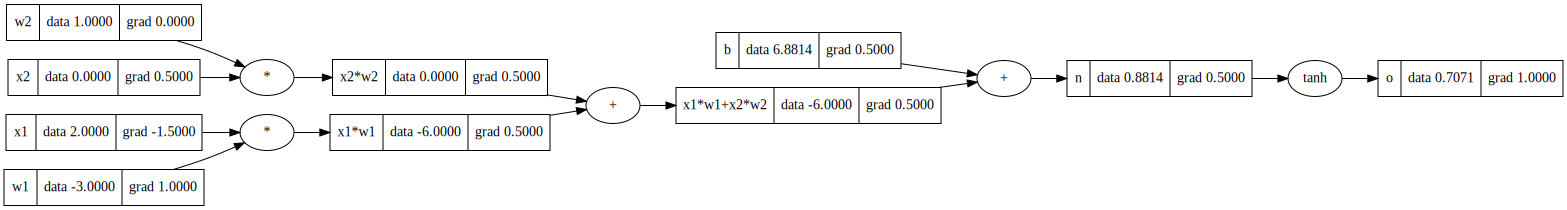

In [ ]:
x2.grad=w2.data*x2w2.grad
w2.grad=x2.data*x2w2.grad
x1.grad=w1.data*x1w1.grad
w1.grad=x1.data*x1w1.grad
draw_dot(o)

# Codifying all that we did previously

adding a self._backward function that will implement back_propagation for the children *nodes*

In [ ]:
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
    self._backward=lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    out= Value(self.data+other.data,(self,other),'+')

    def _backward():
      self.grad=1.0*out.grad;
      other.grad=1.0*out.grad;

    out._backward=_backward
    return out
  def __mul__(self,other):
    out= Value(self.data*other.data,(self,other),'*')

    def _backward():
      self.grad=other.data*out.grad;
      other.grad=self.data*out.grad;


    out._backward=_backward

    return out
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    def _backward():
      self.grad=(1-out.data**2)*out.grad;
      # other.grad=1.0*out.grad;


    out._backward=_backward

    return out

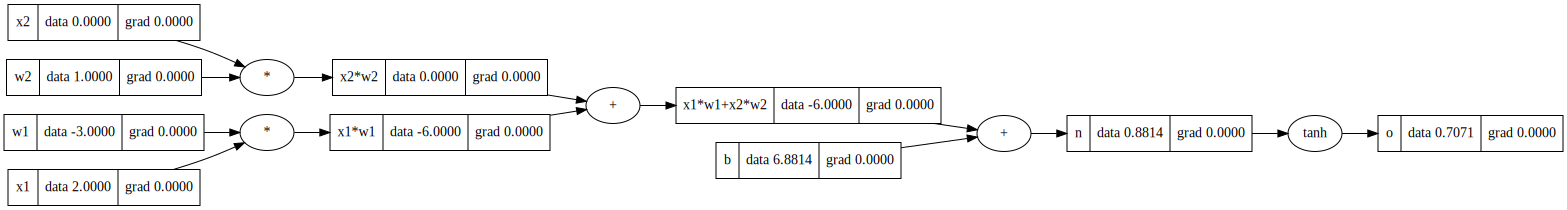

In [ ]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias
b=Value(6.8813735870195432,label='b')
# n = x1*w1+ x2*w2 + b
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'
draw_dot(o)


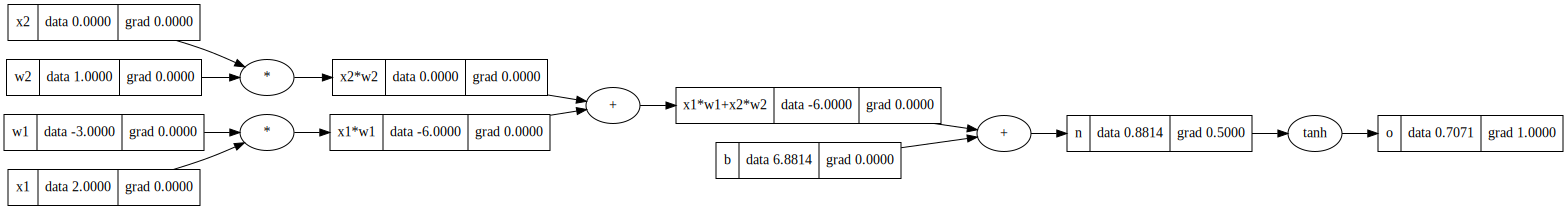

In [ ]:
#initialise o.grad
o.grad=1.0
o._backward()
draw_dot(o)

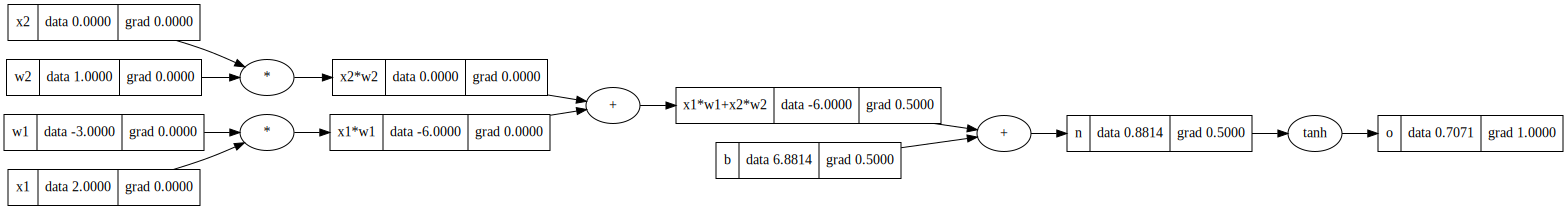

In [ ]:
#grad of n got updated
#now for the children of n
n._backward()
draw_dot(o)

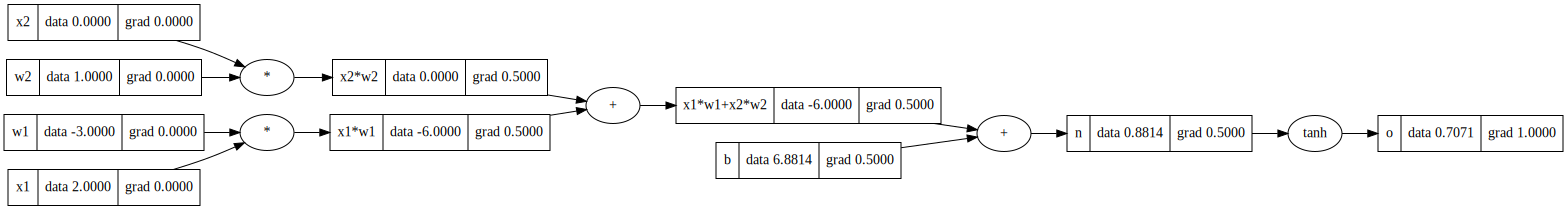

In [ ]:
#grad of x1w1x2w2 and b got updated
#now for the children of x1w1x2w2
x1w1x2w2._backward()
draw_dot(o)

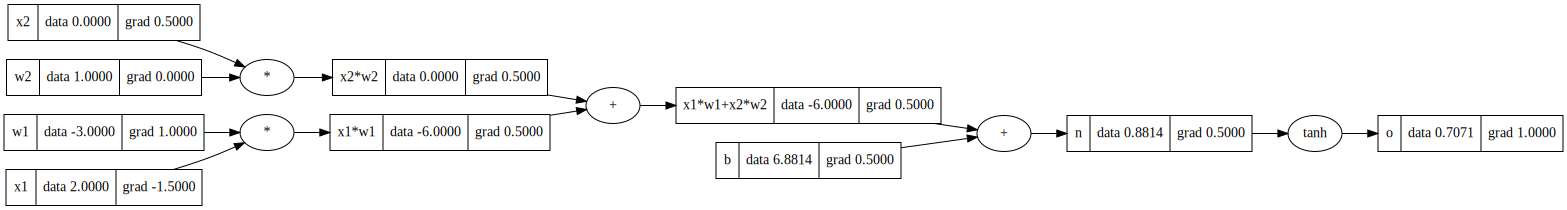

In [ ]:
#grad of x1w1 & x2w2 got updated
#now for the children of x1w1 and x2w2
x2w2._backward()
x1w1._backward()
draw_dot(o)

# Automating the back propagation step (My Implementation)

modifying the self._backward function that will implement back_propagation for the children nodes by calling their ._backward() functions

In [ ]:
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
    self._backward=lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    out= Value(self.data+other.data,(self,other),'+')

    def _backward():
      self.grad=1.0*out.grad;
      other.grad=1.0*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward
    return out
  def __mul__(self,other):
    out= Value(self.data*other.data,(self,other),'*')

    def _backward():
      self.grad=other.data*out.grad;
      other.grad=self.data*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward

    return out
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    def _backward():
      self.grad=(1-out.data**2)*out.grad;
      self._backward()

    out._backward=_backward

    return out

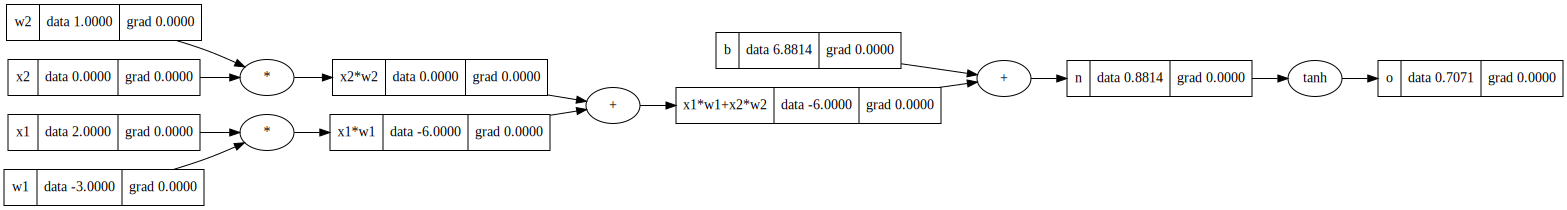

In [ ]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias
b=Value(6.8813735870195432,label='b')
# n = x1*w1+ x2*w2 + b
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'
draw_dot(o)

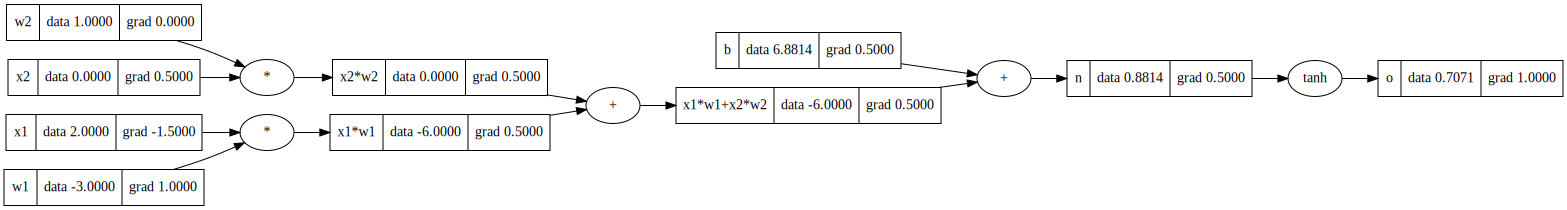

In [ ]:
#initialising o.gradient
o.grad=1
#Complete backpropagation
o._backward()

draw_dot(o)

# Using Topological sorting (Andrej's Method) this is what I am going to use for consistency purposes

In [ ]:
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
    self._backward=lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    out= Value(self.data+other.data,(self,other),'+')

    def _backward():
      self.grad=1.0*out.grad;
      other.grad=1.0*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward
    return out
  def __mul__(self,other):
    out= Value(self.data*other.data,(self,other),'*')

    def _backward():
      self.grad=other.data*out.grad;
      other.grad=self.data*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward

    return out
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    def _backward():
      self.grad=(1-out.data**2)*out.grad;
      self._backward()

    out._backward=_backward
    return out



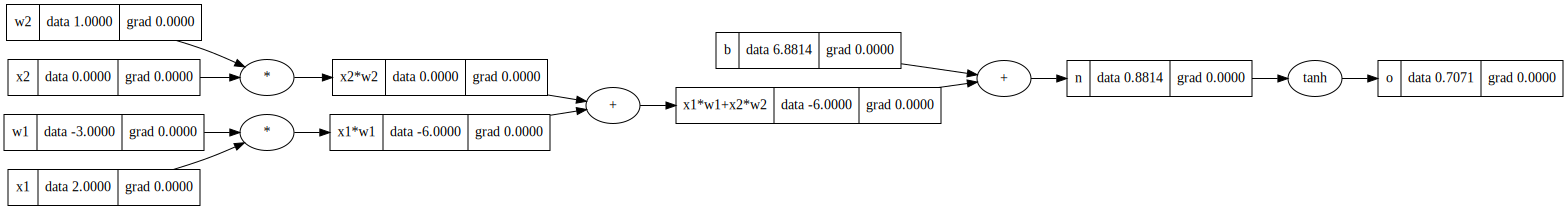

In [ ]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias
b=Value(6.8813735870195432,label='b')
# n = x1*w1+ x2*w2 + b
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'
draw_dot(o)


In [ ]:
##BUILDING A TOPOLOGICAL SORT
topo=[]
visited=set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

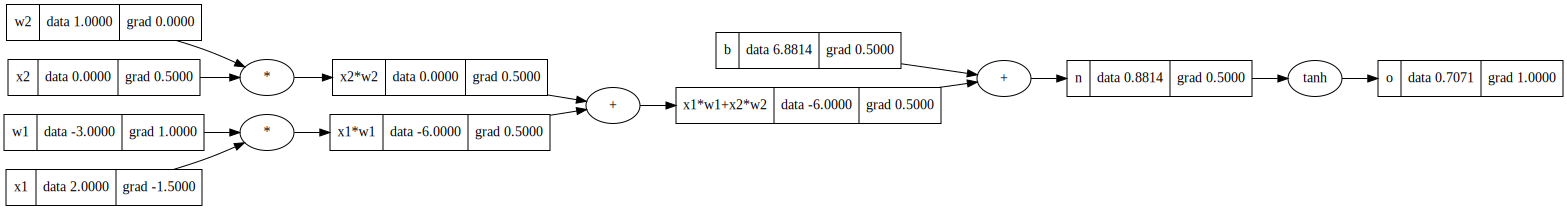

In [ ]:
#using this topo array to do backpropagation
o.grad=1.0
for node in reversed(topo):
  node._backward()
draw_dot(o)

In [ ]:
#implementing a backward function in class
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
    self._backward=lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    out= Value(self.data+other.data,(self,other),'+')

    def _backward():
      self.grad=1.0*out.grad;
      other.grad=1.0*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward
    return out
  def __mul__(self,other):
    out= Value(self.data*other.data,(self,other),'*')

    def _backward():
      self.grad=other.data*out.grad;
      other.grad=self.data*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward

    return out
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    def _backward():
      self.grad=(1-out.data**2)*out.grad;
      self._backward()

    out._backward=_backward
    return out

  def backward(self):
      topo=[]
      self.grad=1.0
      visited=set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      for node in reversed(topo):
        node._backward()

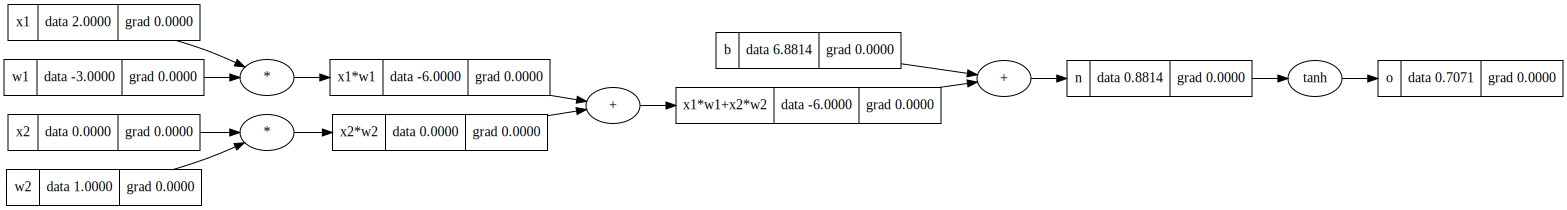

In [ ]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias
b=Value(6.8813735870195432,label='b')
# n = x1*w1+ x2*w2 + b
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'
draw_dot(o)


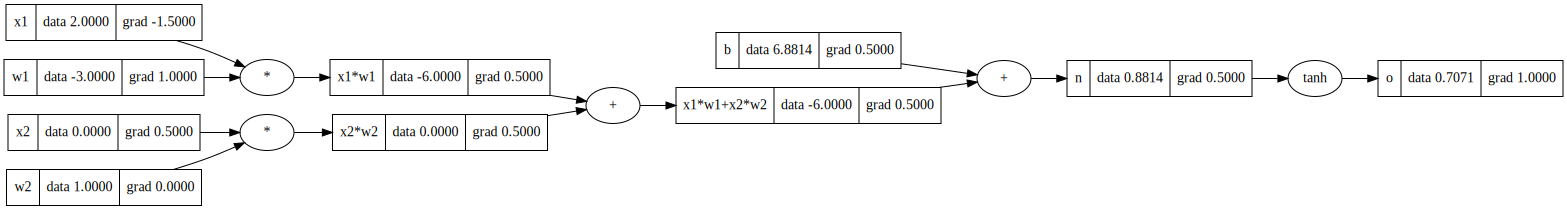

In [ ]:
o.backward()
draw_dot(o)

WE Can see that the above code does the complete backpropagation on its own

#Fixing some bugs

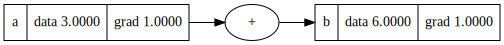

In [ ]:
a=Value(3.0,label='a')
b=a+a; b.label='b'
b.backward()
draw_dot(b)

In the code above b=2*a yet it calculates as if for b=a

we can fix this by modifying the ._backward() function to add values to the gradient rather than assigning them

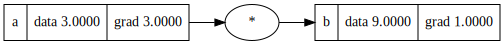

In [ ]:
a=Value(3.0,label='a')
b=a*a; b.label='b'
b.backward()
draw_dot(b)

Similarly
In the code above b=a*a yet it calculates it wrong.

we can fix this by modifying the ._backward() function to add values to the gradient rather than assigning them

In [ ]:
#implementing a backward function in class
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
    self._backward=lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out= Value(self.data+other.data,(self,other),'+')

    def _backward():
      self.grad+=1.0*out.grad;
      other.grad+=1.0*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward
    return out
  def __mul__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out= Value(self.data*other.data,(self,other),'*')

    def _backward():
      self.grad+=other.data*out.grad;
      other.grad+=self.data*out.grad;
      self._backward()
      other._backward()

    out._backward=_backward
    return out
  def __rmul__(self,other):
    return self*other
  def __radd__(self,other):
    return self+other
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    def _backward():
      self.grad+=(1-out.data**2)*out.grad;
      self._backward()

    out._backward=_backward
    return out

  def backward(self):
      topo=[]
      self.grad=1.0
      visited=set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      for node in reversed(topo):
        node._backward()

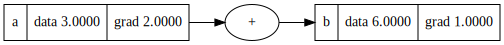

In [ ]:
a=Value(3.0,label='a')
b=a+a; b.label='b'
b.backward()
draw_dot(b)

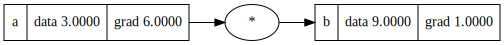

In [ ]:
a=Value(3.0,label='a')
b=a*a; b.label='b'
b.backward()
draw_dot(b)

In [ ]:
#also implemented a+1
a=Value(2.0)
a+2
2+a

Value(data=4.0)

In [ ]:
a*2

Value(data=4.0)

In [ ]:
3*a

Value(data=6.0)

# Adding more Library

In [ ]:
#implementing a backward function in class
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
    self._backward=lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out= Value(self.data+other.data,(self,other),'+')

    def _backward():
      self.grad+=1.0*out.grad;
      other.grad+=1.0*out.grad;


    out._backward=_backward
    return out
  # add -a function
  def __neg__(self):
    return self*-1
  #implement a-b using a+b
  def __sub__(self,other):
    return self+(-other)

  def __mul__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out= Value(self.data*other.data,(self,other),'*')

    def _backward():
      self.grad+=other.data*out.grad;
      other.grad+=self.data*out.grad;


    out._backward=_backward
    return out
  def __rmul__(self,other):
    return self*other
  def __rsub__(self, other): # other - self
        return other + (-self)

  def __radd__(self,other):
    return self+other
  #add division
  def __truediv__(self,other):
    return self*other**-1
  #add power a**b
  def __pow__(self,other):
    assert isinstance(other, (int,float)),"only supporting int and float for now"
    out=Value(self.data**other,(self,),f'**{other}')

    def _backward():
      self.grad+=other*(self.data**(other-1))*out.grad;

    out._backward=_backward
    return out


  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    def _backward():
      self.grad+=(1-out.data**2)*out.grad;


    out._backward=_backward
    return out
   #add exp(self)
  def exp(self):
    x=self.data;
    out=Value(math.exp(x),(self,),'exp')

    def _backward():
      self.grad+=out.data*out.grad;

    out._backward=_backward
    return out

  def backward(self):
      topo=[]
      self.grad=1.0
      visited=set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      for node in reversed(topo):
        node._backward()

In [ ]:
#TODO 2-Value(2) is giving error

In [ ]:
a=Value(1.0)
print(a.exp())

Value(data=2.718281828459045)


In [ ]:
a=Value(1)
b=Value(8)
# a**3.0
a-b



Value(data=-7)

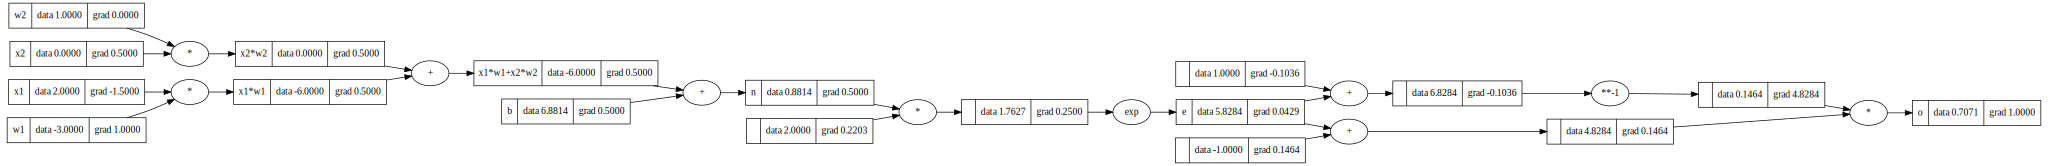

In [ ]:
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias
b=Value(6.8813735870195432,label='b')
# n = x1*w1+ x2*w2 + b
x1w1=x1*w1;x1w1.label='x1*w1'
x2w2=x2*w2;x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2;x1w1x2w2.label='x1*w1+x2*w2'
n=x1w1x2w2+b;n.label='n'
# --------- opening up tanh
# o=n.tanh;
e=(2*n).exp(); e.label='e'
o=(e-1)/(e+1)
# ---------
o.label='o'
o.backward()
draw_dot(o)


# Sidenotes: Pytorch implementation of the same


In [ ]:
import torch

x1=torch.Tensor([2.0]).double() ;x1.requires_grad=True
x2=torch.Tensor([0.0]).double() ;x2.requires_grad=True
w1=torch.Tensor([-3.0]).double() ;w1.requires_grad=True
w2=torch.Tensor([1.0]).double() ;w2.requires_grad=True
b=torch.Tensor([6.8813735870195432]).double() ;b.requires_grad=True
n=x1*w1+x2*w2 +b
o=torch.tanh(n)

print(o.data.item())
o.backward()
print('-----')
print('x2',x2.grad.item())
print('w2',w2.grad.item())
print('x1',x1.grad.item())
print('w1',w1.grad.item())

0.7071066904050358
-----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


## We can see that result by pytorch and our implementations is the same

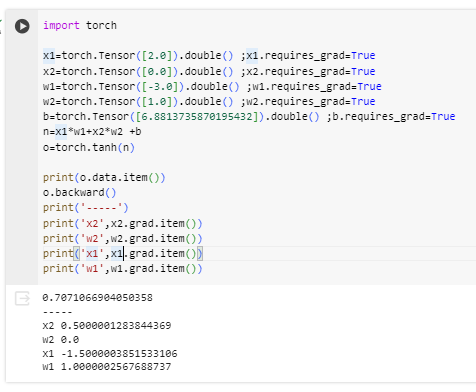 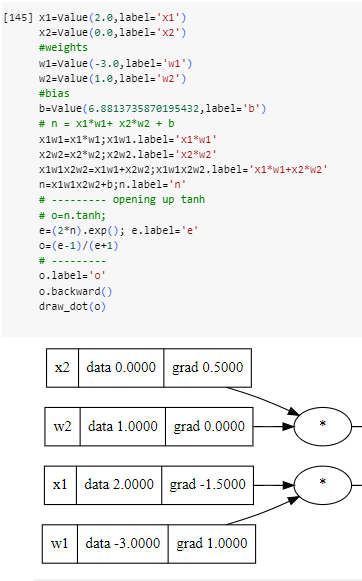

#Building a Neural Network
We are going to build a two layer Perceptron

## Implementation of a Neuron:

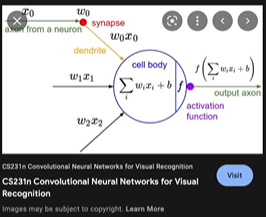

In [ ]:
import random
class Neuron:
  def __init__(self,nin):
    self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b=Value(random.uniform(-1,1))
  def __call__(self,x):
    """
      returns the tanh(activation function result) of the dot product of the neuron
    """
    #w*x+b
    act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
    out=act.tanh()

    return out

class Layer:
  def __init__(self,nin,nout):
    self.neurons=[Neuron(nin) for i in range(nout)]

  def __call__(self,x):
    outs=[n(x) for n in self.neurons]
    return outs


x=[2.0,3.0]
n=Neuron(2)
print(n(x))
n=Layer(2,3)
n(x)

Value(data=0.9525325292047939)


[Value(data=0.9842034291547078),
 Value(data=-0.7693172750964156),
 Value(data=-0.8725014404005976)]

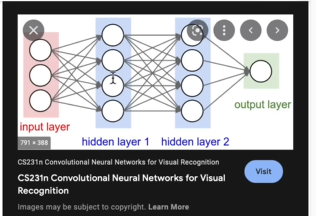

In [ ]:
import random
class Neuron:
  def __init__(self,nin):
    self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b=Value(random.uniform(-1,1))
  def __call__(self,x):
    """
      returns the tanh(activation function result) of the dot product of the neuron
    """
    #w*x+b
    act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
    out=act.tanh()

    return out

class Layer:
  def __init__(self,nin,nout):
    self.neurons=[Neuron(nin) for i in range(nout)]

  def __call__(self,x):
    out = [n(x) for n in self.neurons]
    return out[0] if len(out) == 1 else out

class MLP:
  def __init__(self,nin,nouts):
    sz=[nin]+nouts
    self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    #sz[i]=nin, sz[i+1]=nout for ith layer
    # there will be total len(nouts) hidden layers and 1 output layer
  def __call__(self,x):
    for layer in self.layers:
      x=layer(x)
    return x
n=MLP(3,[4,4,1])
x=[2.0,3.0,-1.0]
n(x)
# l[0].backward()
# draw_dot(l[0])


Value(data=0.07141263318903368)

#Example dataset

In [ ]:
n=MLP(3,[4,4,1])
xs=[
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]
ys=[1.0,-1.0,-1.0,1.0]#desired targets
ypred=[n(x) for x in xs]
ypred

[Value(data=-0.6796004907800398),
 Value(data=-0.26589341479159734),
 Value(data=-0.7348804182136413),
 Value(data=-0.5867340368334306)]

In [ ]:
ypred=[n(x) for x in xs]
ypred

[[Value(data=0.8552958149822898)],
 [Value(data=0.9833814474860673)],
 [Value(data=0.9407603516500963)],
 [Value(data=0.931939371410025)]]

How do we tune the nets to give closer values to ys?

In [ ]:
loss=sum(yout-Value(ygt) for ygt, yout in zip(ys,ypred))
loss

Value(data=-2.267108360618709)

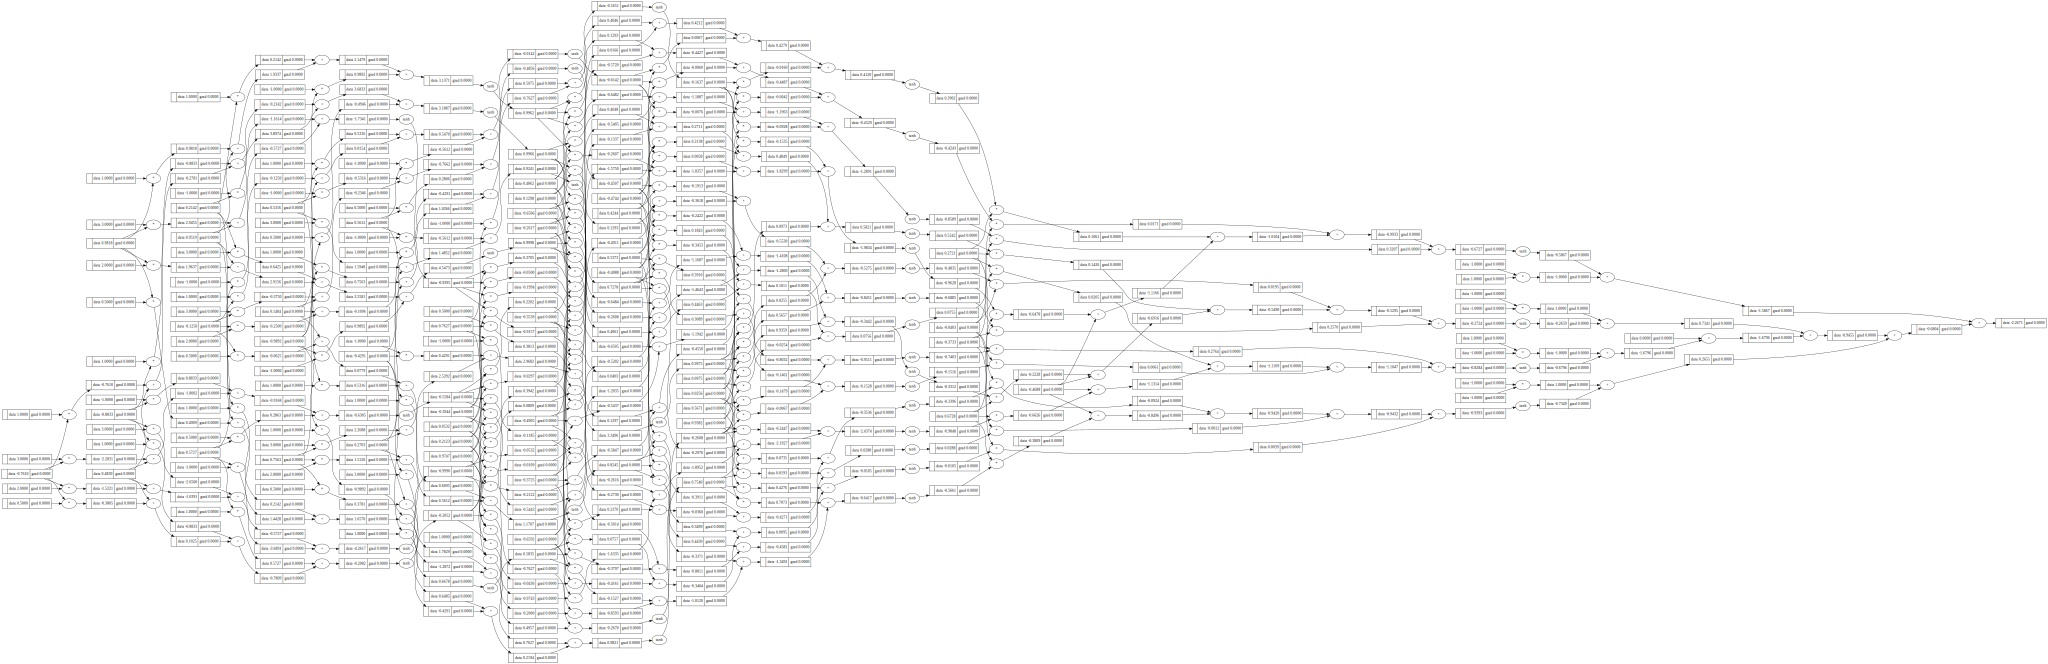

In [ ]:
draw_dot(loss)

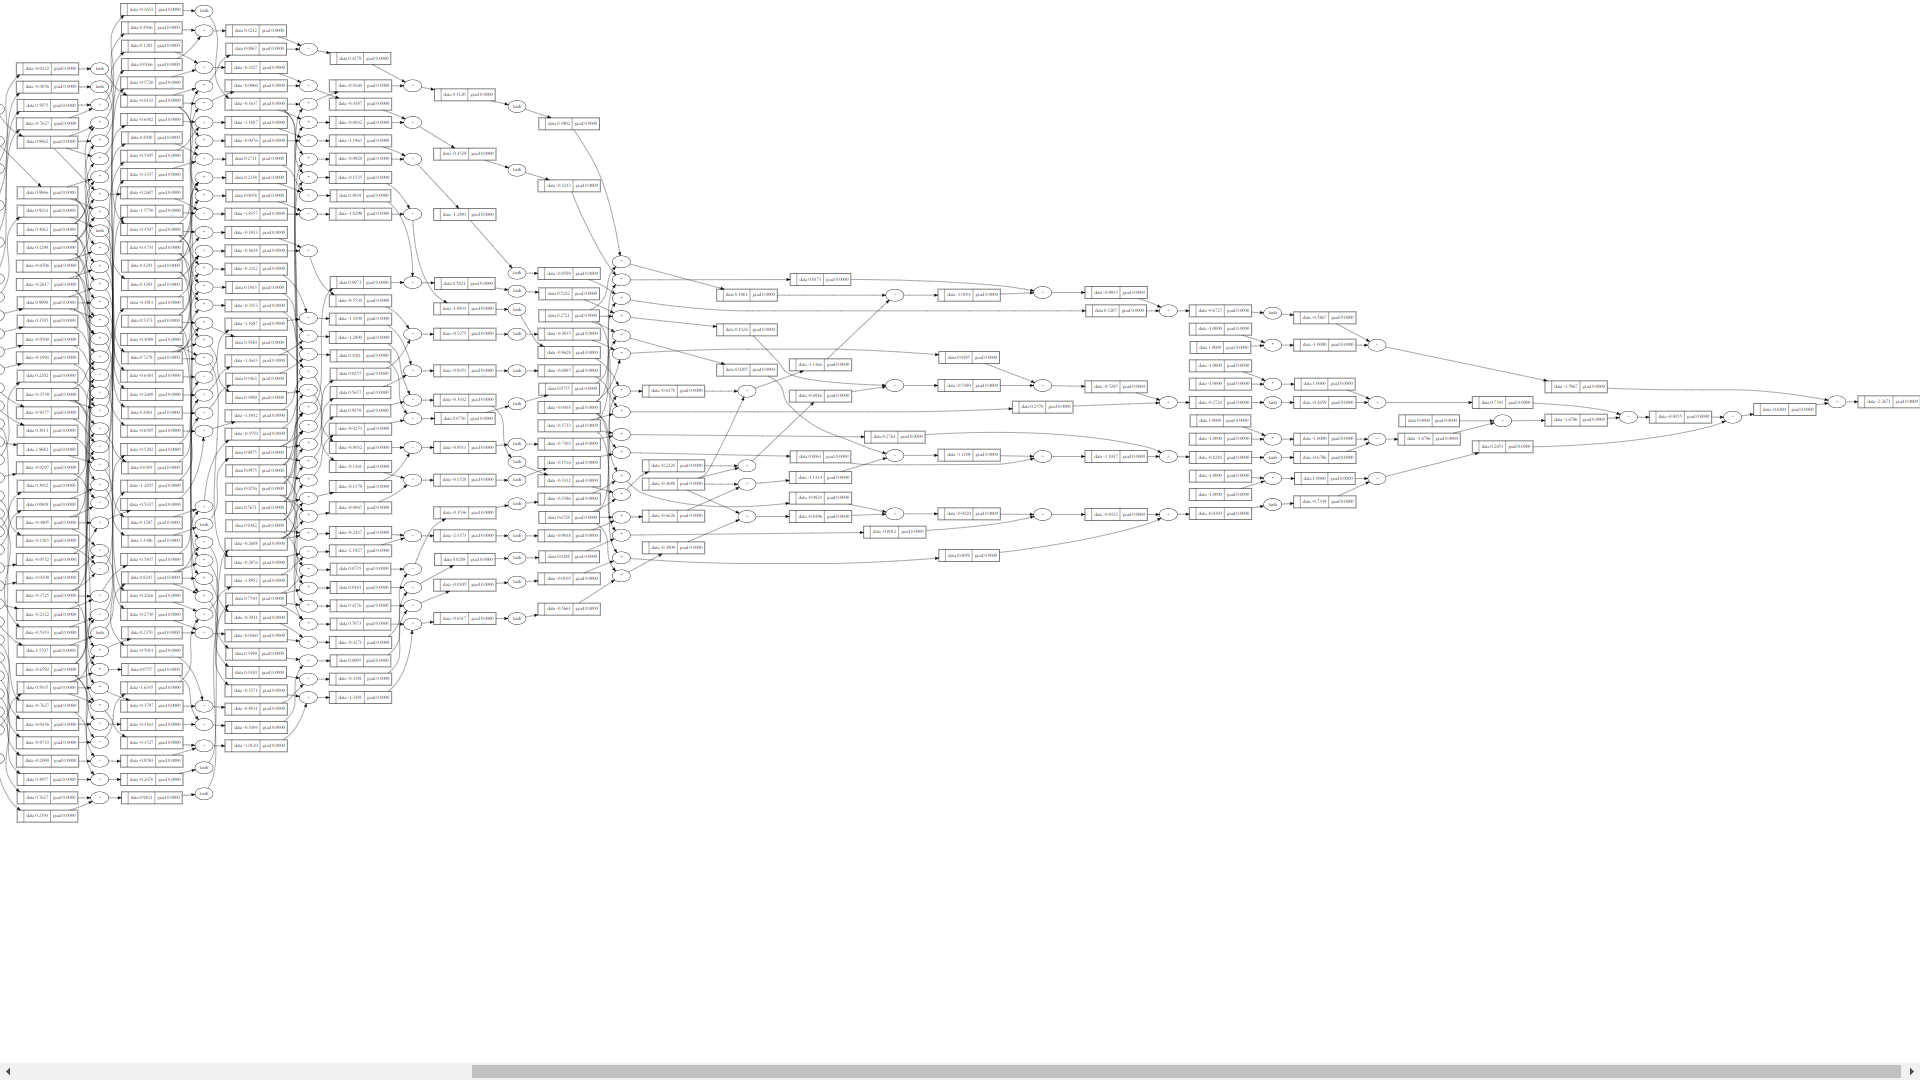

WE GET SOMETHING LIKE THIS WHERE THE END NODE IS THE LOSS NODE AND NOW WE CAN USE THIS GRAPH TO TRAIN IT!

First off, we find the gradient of each node

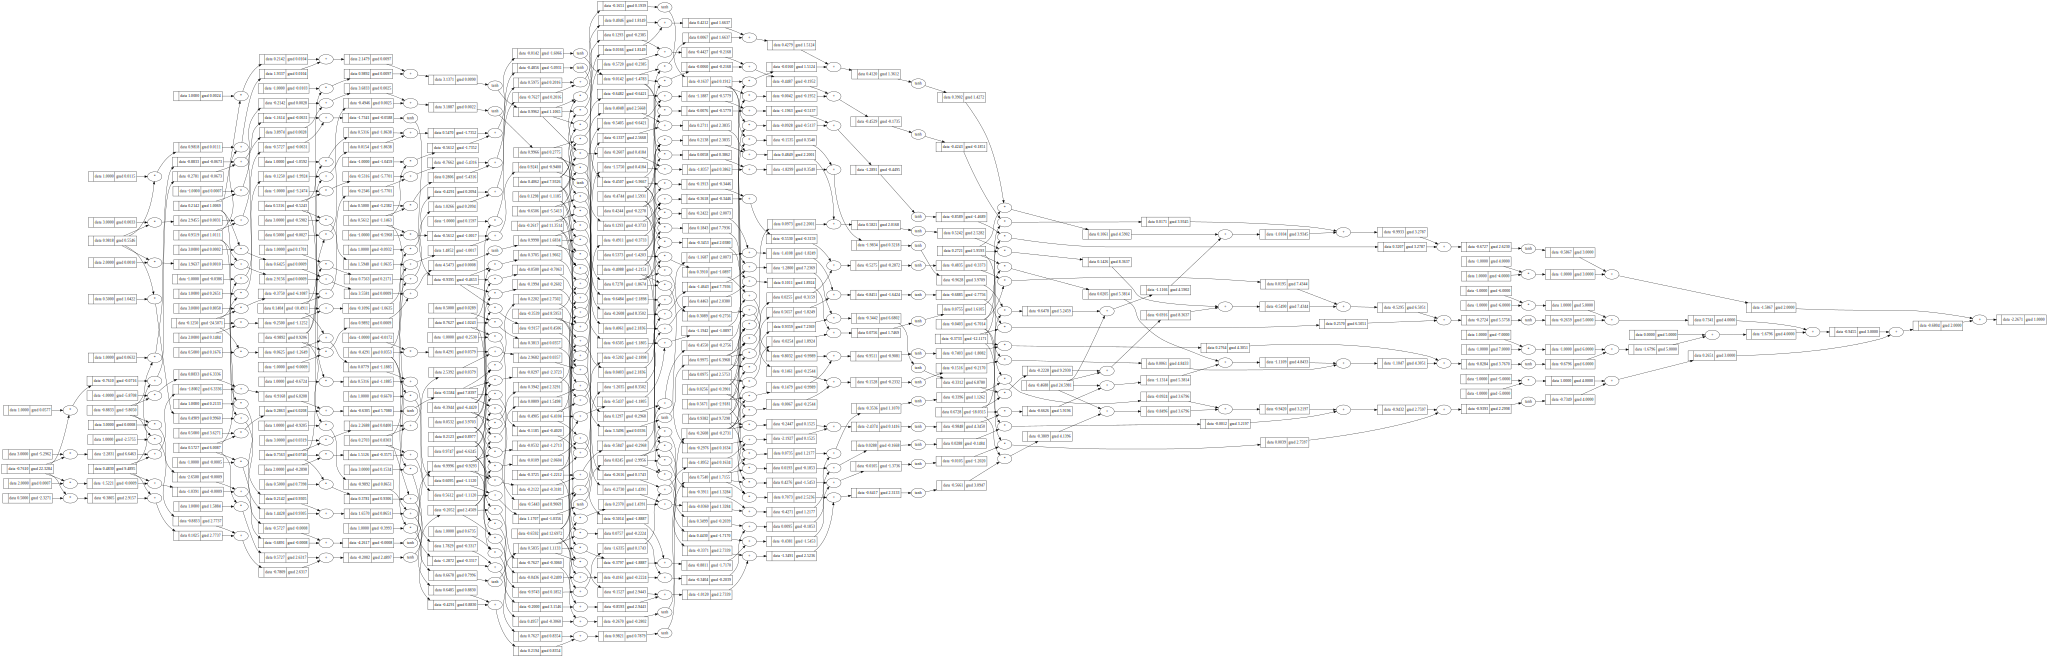

In [ ]:
loss.backward()
draw_dot(loss)

In [ ]:
n

In [ ]:
n.layers

In [ ]:
n.layers[0]

In [ ]:
n.layers[0].neurons

In [ ]:
n.layers[0].neurons[0]

In [ ]:
n.layers[0].neurons[0].w

[Value(data=-0.7610437309326314),
 Value(data=-0.8833202939995717),
 Value(data=0.5726724821150999)]

In [ ]:
n.layers[0].neurons[0].w[0]

Value(data=-0.7610437309326314)

In [ ]:
n.layers[0].neurons[0].w[0].grad

1.004961560604352

We have the gradients of each weight Value node. We can nudge each of their values slightly in the direction opposite to their gradients which will lower the gradient

In [ ]:
import random
class Neuron:
  def __init__(self,nin):
    self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b=Value(random.uniform(-1,1))
  def __call__(self,x):
    """
      returns the tanh(activation function result) of the dot product of the neuron
    """
    #w*x+b
    act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
    out=act.tanh()
    return out

  def parameters(self):
    return self.w+[self.b]





class Layer:
  def __init__(self,nin,nout):
    self.neurons=[Neuron(nin) for i in range(nout)]

  def __call__(self,x):
    out = [n(x) for n in self.neurons]
    return out[0] if len(out) == 1 else out

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
  def __init__(self,nin,nouts):
    sz=[nin]+nouts
    self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    #sz[i]=nin, sz[i+1]=nout for ith layer
    # there will be total len(nouts) hidden layers and 1 output layer
  def __call__(self,x):
    for layer in self.layers:
      x=layer(x)
    return x
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]
#
# l[0].backward()
# draw_dot(l[0])


Value(data=0.30223145147241826)

[Value(data=0.8585504266580399),
 Value(data=-0.9779761266336491),
 Value(data=-0.23331595073097677),
 Value(data=-0.28110688022033803),
 Value(data=0.585273240362365),
 Value(data=-0.12894857502073154),
 Value(data=-0.366771177967971),
 Value(data=-0.253043631082956),
 Value(data=-0.9516577073419958),
 Value(data=-0.3355209867099802),
 Value(data=-0.00244567050418687),
 Value(data=0.631878705011957),
 Value(data=-0.5444200850805012),
 Value(data=-0.7200237016126676),
 Value(data=0.26101243430301024),
 Value(data=-0.8508087449078301),
 Value(data=-0.4139485196603352),
 Value(data=0.8784309943115205),
 Value(data=0.04785740940338212),
 Value(data=0.9451863581505136),
 Value(data=0.16821564604895323),
 Value(data=-0.3124282531861433),
 Value(data=0.07927180059504413),
 Value(data=0.8667449142222343),
 Value(data=-0.05608105369363936),
 Value(data=-0.6888812790093382),
 Value(data=-0.23402658838701917),
 Value(data=-0.15467720752616754),
 Value(data=-0.19451025943385036),
 Value(data=-0.5

In [ ]:
len(n.parameters())

41

In [ ]:
n=MLP(3,[4,4,1])
xs=[
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]
ys=[1.0,-1.0,-1.0,1.0]#desired targets
ypred=[n(x) for x in xs]
ypred


[Value(data=-0.04722065668202865),
 Value(data=0.5177317247507589),
 Value(data=0.21743603527973496),
 Value(data=-0.0331174684866146)]

In [ ]:
n.parameters()


[Value(data=0.8334684744970662),
 Value(data=0.3251659905880788),
 Value(data=0.39294882982261914),
 Value(data=-0.13271454723432696),
 Value(data=-0.26508843005446314),
 Value(data=-0.0006509338623559291),
 Value(data=-0.4455520418034684),
 Value(data=0.4548843062505683),
 Value(data=-0.32603107334985504),
 Value(data=0.8211770102335354),
 Value(data=0.6358964901703907),
 Value(data=-0.01096239805646726),
 Value(data=-0.12463417253365194),
 Value(data=-0.4477148809432261),
 Value(data=-0.4411841047530296),
 Value(data=0.49520779968464246),
 Value(data=0.7520534807964947),
 Value(data=0.6098933470649541),
 Value(data=0.614713954707097),
 Value(data=0.07128883969075117),
 Value(data=-0.6383180690280545),
 Value(data=-0.932317083467183),
 Value(data=-0.11963332328285015),
 Value(data=-0.6360703084661712),
 Value(data=-0.13258235889529413),
 Value(data=-0.7537486145496182),
 Value(data=-0.664047046130747),
 Value(data=-0.4214845152568989),
 Value(data=0.4949533064338736),
 Value(data=-0.8

In [ ]:
loss=sum((yout-Value(ygt))**2 for ygt, yout in zip(ys,ypred))
loss

Value(data=5.949662895786283)

In [ ]:
loss.backward()
draw_dot(loss)

In [ ]:
n.layers[0].neurons[0].w[1].data

0.5259689812742527

In [ ]:
#current loss=Value(data=3.950087047481709)

WE are now going to change the values of the weight nodes so that the overall loss decreases. We do this by moving away from each node's gradient by a small amount

In [ ]:
h=0.1
for p in n.parameters():
  p.data-=p.grad*h
ypred=[n(x) for x in xs]
loss=sum((yout-Value(ygt))**2 for ygt, yout in zip(ys,ypred))
loss.backward()
loss

Value(data=4.055545796048364e-18)

In [ ]:
#After each iteration loss
#Original Value(data=5.949662895786283)
#1 iter Value(data=3.869772079860257)
#2 iter Value(data=2.5870078207972975)
#3 iter Value(data=0.7846645313070697)
#4 iter Value(data=0.05747366714596378)
#5 iter Value(data=0.004171585217822361)
#6 iter Value(data=0.0035332310849274266)
#7 iter Value(data=0.010261097752101498) overstepping
#8 iter Value(data=0.03282245282253817)
#9 iter Value(data=0.028794701491381112)
#10 iter Value(data=0.0012118440100805936)
#11 iter Value(data=3.8371434345337747e-07)
#12 iter Value(data=5.587455472785506e-13)
# Value(data=1.2474692125867613e-16)
# Value(data=4.055545796048364e-18) highly overtrained

In [ ]:
ypred=[n(x) for x in xs]
ypred

[Value(data=0.9999999985914756),
 Value(data=-0.9999999999871295),
 Value(data=-0.9999999999998499),
 Value(data=0.9999999985607505)]

In [ ]:
ys

[1.0, -1.0, -1.0, 1.0]

# We can see that the neural network has been trained!!!!!! This method is called Gradient descent

In [ ]:
n.layers[0].neurons[0].w[1].data

0.8669975730900448

#Automating this with code

In [ ]:
n=MLP(3,[4,4,1])
xs=[
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]
ys=[1.0,-1.0,-1.0,1.0]#desired targets

In [ ]:
h=0.1
loss_vals=[]
for k in range(200):
  #forward pass
  ypred=[n(x) for x in xs]
  loss=sum((yout-Value(ygt))**2 for ygt, yout in zip(ys,ypred))
  loss_vals.append(loss.data)
  print(k,loss.data)

  #flushing the grads to 0 becasue we update using +=s not =
  #so each time their grads keep on accumulating if we don't do this!!!
  for p in n.parameters():
    p.grad=0.0

  #backward pass
  loss.backward()

  #update
  for p in n.parameters():
    p.data-=p.grad*h
# ypred=[n(x) for x in xs]
# print(ypred)
# loss_vals

0 0.0010280853658299087
1 0.001023722168787886
2 0.001019395290461641
3 0.0010151042790903857
4 0.0010108486904220589
5 0.0010066280875564767
6 0.0010024420407923576
7 0.0009982901274782332
8 0.0009941719318671423
9 0.0009900870449748868
10 0.0009860350644418532
11 0.000982015594398141
12 0.0009780282453321935
13 0.0009740726339624651
14 0.0009701483831123206
15 0.0009662551215879253
16 0.0009623924840591266
17 0.0009585601109431584
18 0.000954757648291124
19 0.0009509847476772621
20 0.0009472410660907816
21 0.000943526265830198
22 0.0009398400144003241
23 0.0009361819844114766
24 0.0009325518534812225
25 0.0009289493041382486
26 0.0009253740237285548
27 0.0009218257043238025
28 0.0009183040426317361
29 0.0009148087399086266
30 0.0009113395018738297
31 0.0009078960386261058
32 0.0009044780645620137
33 0.0009010852982959712
34 0.0008977174625822229
35 0.0008943742842385514
36 0.0008910554940715429
37 0.000887760826803718
38 0.0008844900210021051
39 0.0008812428190084411
40 0.00087801896

#Testing our MLP on more complex data

In [ ]:
#implementing a backward function in class
class Value:
  def __init__(self,data,_children=(),_op='', label=''):
    self.data=data
    self._prev=set(_children)
    self._op=_op
    self.label=label
    self.grad=0.0
    self._backward=lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out= Value(self.data+other.data,(self,other),'+')

    def _backward():
      self.grad+=1.0*out.grad;
      other.grad+=1.0*out.grad;


    out._backward=_backward
    return out
  # add -a function
  def __neg__(self):
    return self*-1
  #implement a-b using a+b
  def __sub__(self,other):
    return self+(-other)

  def __mul__(self,other):
    other=other if isinstance(other,Value) else Value(other)
    out= Value(self.data*other.data,(self,other),'*')

    def _backward():
      self.grad+=other.data*out.grad;
      other.grad+=self.data*out.grad;


    out._backward=_backward
    return out
  def __rmul__(self,other):
    return self*other
  def __rsub__(self, other): # other - self
        return other + (-self)

  def __radd__(self,other):
    return self+other
  #add division
  def __truediv__(self,other):
    return self*other**-1
  #add power a**b
  def __pow__(self,other):
    assert isinstance(other, (int,float)),"only supporting int and float for now"
    out=Value(self.data**other,(self,),f'**{other}')

    def _backward():
      self.grad+=other*(self.data**(other-1))*out.grad;

    out._backward=_backward
    return out

  def relu(self):
    out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

    def _backward():
        self.grad += (out.data > 0) * out.grad
    out._backward = _backward

    return out
  def tanh(self):
    x=self.data
    t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
    out=Value(t,(self,),'tanh')
    def _backward():
      self.grad+=(1-out.data**2)*out.grad;


    out._backward=_backward
    return out
   #add exp(self)
  def exp(self):
    x=self.data;
    out=Value(math.exp(x),(self,),'exp')

    def _backward():
      self.grad+=out.data*out.grad;

    out._backward=_backward
    return out

  def backward(self):
      topo=[]
      self.grad=1.0
      visited=set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      for node in reversed(topo):
        node._backward()

In [ ]:
import random
class Neuron:
  def __init__(self,nin):
    self.w=[Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b=Value(random.uniform(-1,1))
  def __call__(self,x):
    """
      returns the tanh(activation function result) of the dot product of the neuron
    """
    #w*x+b
    act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
    out=act.tanh()
    return out

  def parameters(self):
    return self.w+[self.b]





class Layer:
  def __init__(self,nin,nout):
    self.neurons=[Neuron(nin) for i in range(nout)]

  def __call__(self,x):
    out = [n(x) for n in self.neurons]
    return out[0] if len(out) == 1 else out

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]


class MLP:
  def __init__(self,nin,nouts):
    sz=[nin]+nouts
    self.layers=[Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    #sz[i]=nin, sz[i+1]=nout for ith layer
    # there will be total len(nouts) hidden layers and 1 output layer
  def __call__(self,x):
    for layer in self.layers:
      x=layer(x)
    return x
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]
#
# l[0].backward()
# draw_dot(l[0])


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(1337)
random.seed(1337)

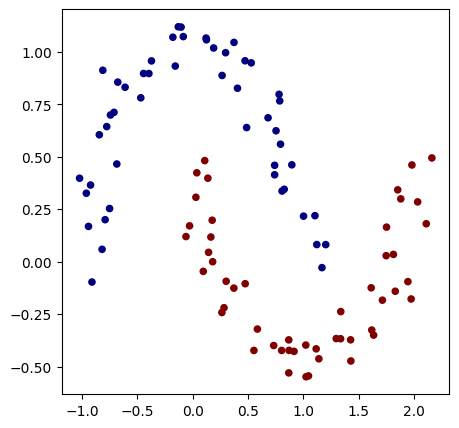

In [ ]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

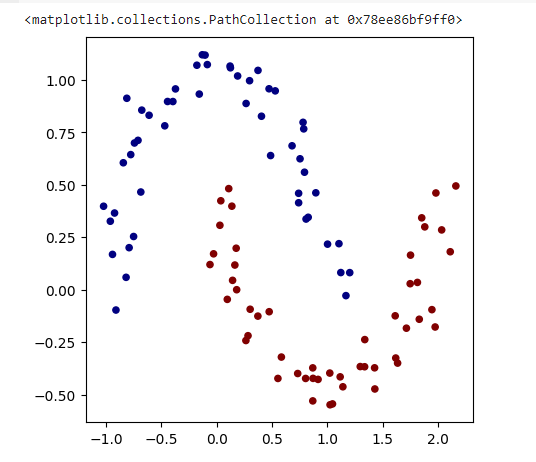

In [ ]:
# initialize a model
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

number of parameters 337


In [ ]:
# loss function
def loss(batch_size=None):

    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.6014937570821497) 0.79


Training the model on this data

In [ ]:
for k in range(38,100):
  #forward pass
  total_loss, acc = loss()

  #flushing the grads to 0 becasue we update using +=s not =
  #so each time their grads keep on accumulating if we don't do this!!!
  for p in n.parameters():
    p.grad=0.0

  #backward pass
  total_loss.backward()

  #update
  learning_rate =  1.0 - 0.9*k/100
  for p in model.parameters():
      p.data -= learning_rate * p.grad

  print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 38 loss 0.28053758348451374, accuracy 96.0%
step 39 loss 0.2885747859748142, accuracy 96.0%
step 40 loss 0.296627614850451, accuracy 96.0%
step 41 loss 0.3042157642829594, accuracy 96.0%
step 42 loss 0.29505498522015516, accuracy 97.0%
step 43 loss 0.29829141319622315, accuracy 97.0%
step 44 loss 0.29312537650394666, accuracy 98.0%
step 45 loss 0.3169311009084476, accuracy 97.0%
step 46 loss 0.3250507419406052, accuracy 97.0%
step 47 loss 0.3331945806406875, accuracy 97.0%
step 48 loss 0.36135067509426677, accuracy 96.0%
step 49 loss 0.36950974900814776, accuracy 96.0%
step 50 loss 0.3976571205672559, accuracy 95.0%
step 51 loss 0.40578955914704584, accuracy 95.0%
step 52 loss 0.4138905706434861, accuracy 95.0%
step 53 loss 0.4219526469325709, accuracy 95.0%
step 54 loss 0.42996651735410907, accuracy 95.0%
step 55 loss 0.4379232635809471, accuracy 95.0%
step 56 loss 0.44658387877556804, accuracy 95.0%
step 57 loss 0.48627640516695175, accuracy 93.0%
step 58 loss 0.5108461787965637

KeyboardInterrupt: ignored

(-1.548639298268643, 1.951360701731357)

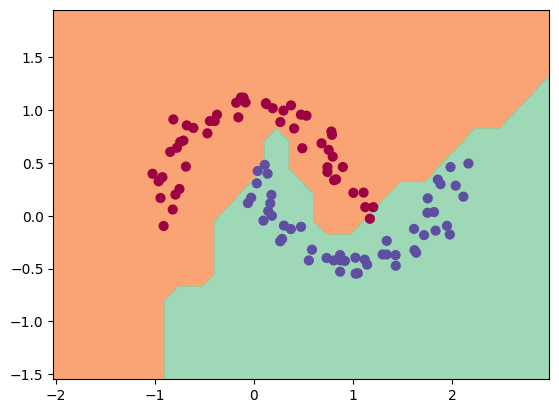

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

INITIALLY

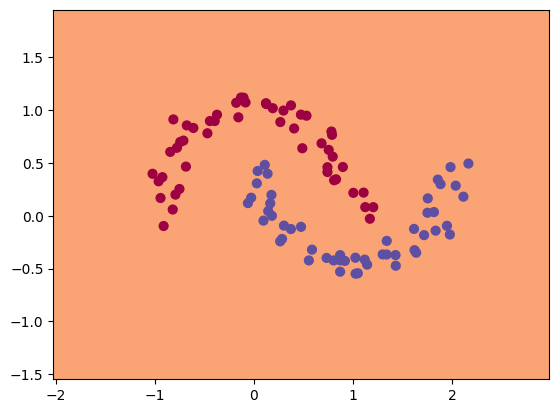
or
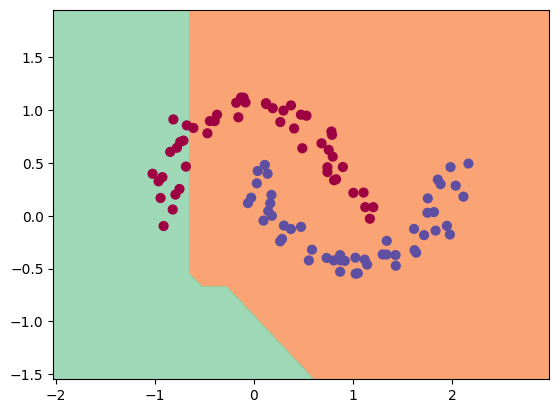

# best result

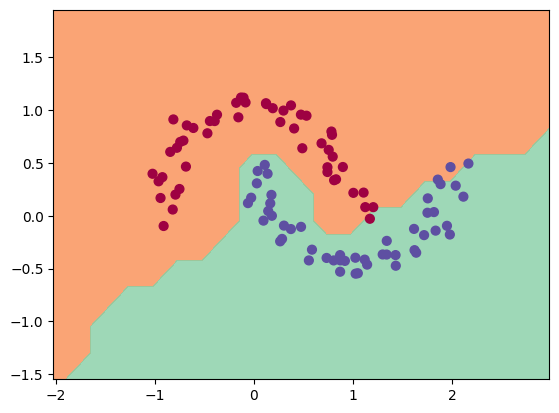

#more results

using tanh
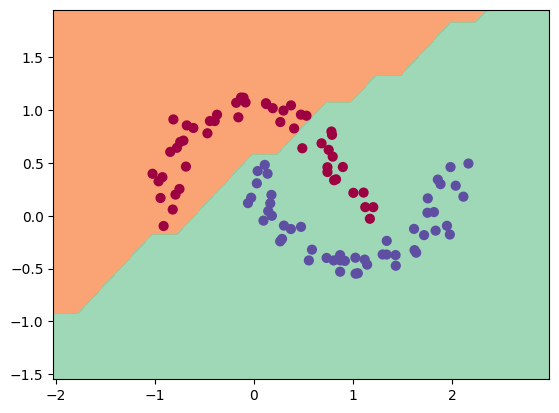

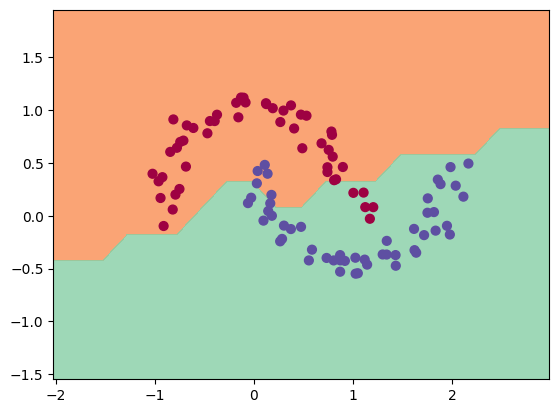

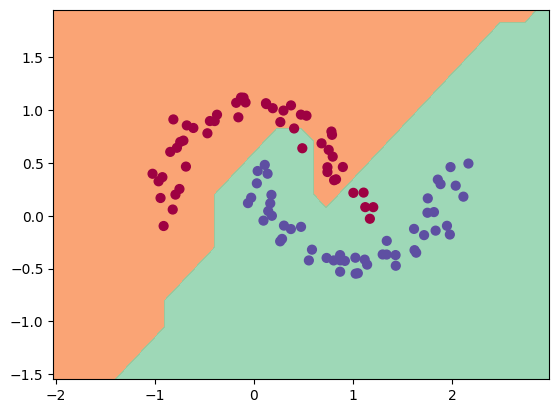

step 53
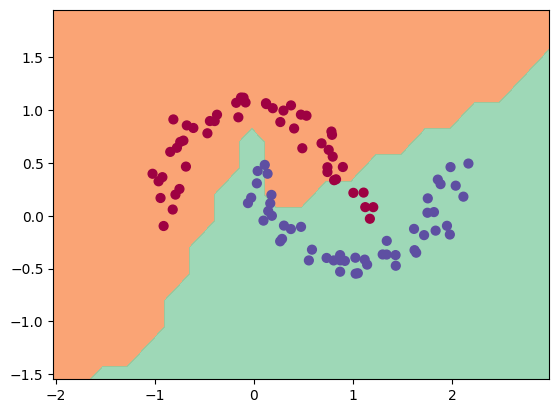

step 59
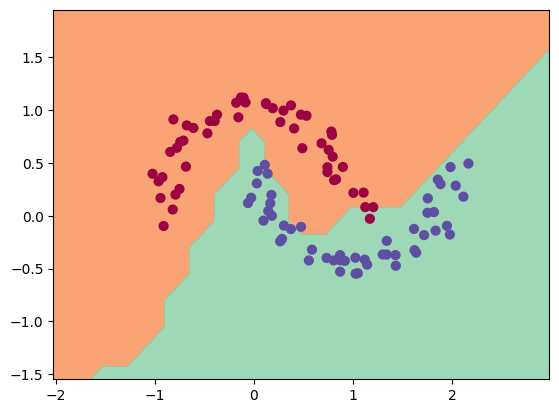

step 75
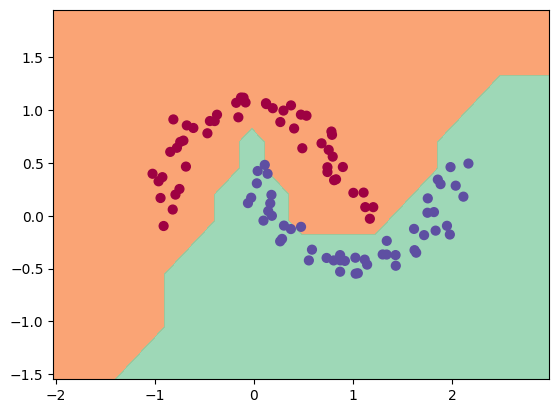

step 37 of another trial

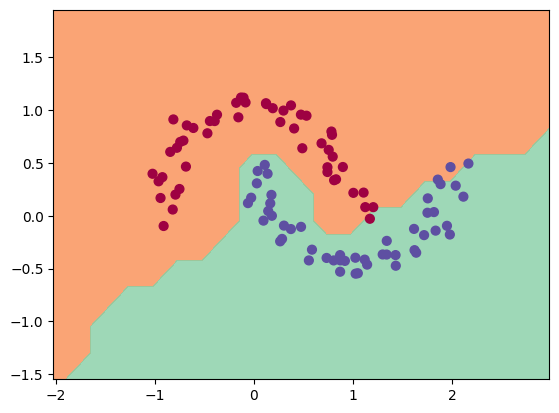

step 75 of the same trial as above 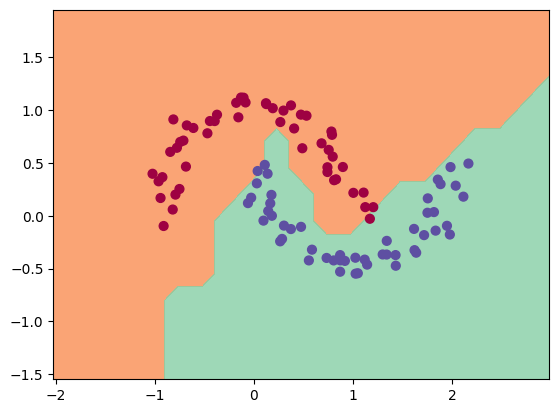

#Answers are still pretty random

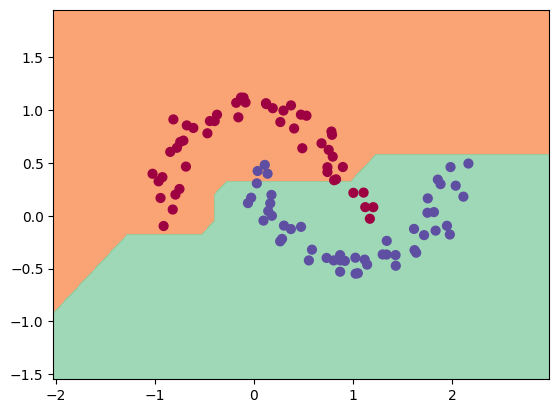